
## Import of librairies and dataset

In [481]:
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import numpy as np


import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score


In [482]:
data = pd.read_csv("Walmart_Store_sales.csv")

display(data.head())

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0    6.0  18-02-2011    1572117.54           NaN        59.61       3.045   
1   13.0  25-03-2011    1807545.43           0.0        42.38       3.435   
2   17.0  27-07-2012           NaN           0.0          NaN         NaN   
3   11.0         NaN    1244390.03           0.0        84.57         NaN   
4    6.0  28-05-2010    1644470.66           0.0        78.89       2.759   

          CPI  Unemployment  
0  214.777523         6.858  
1  128.616064         7.470  
2  130.719581         5.936  
3  214.556497         7.346  
4  212.412888         7.092

## EDA

### Data explore

In [483]:
print("Number of rows : {}".format(data.shape[0]))
print("Number of columns : {}".format(data.shape[1]))

display(data.head())


Number of rows : 150
Number of columns : 8


Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0    6.0  18-02-2011    1572117.54           NaN        59.61       3.045   
1   13.0  25-03-2011    1807545.43           0.0        42.38       3.435   
2   17.0  27-07-2012           NaN           0.0          NaN         NaN   
3   11.0         NaN    1244390.03           0.0        84.57         NaN   
4    6.0  28-05-2010    1644470.66           0.0        78.89       2.759   

          CPI  Unemployment  
0  214.777523         6.858  
1  128.616064         7.470  
2  130.719581         5.936  
3  214.556497         7.346  
4  212.412888         7.092

### Basics stats

In [484]:
print("Basics statistics: \n")
data_desc = data.describe(include='all')
display(data_desc)

print("\nPercentage of missing values: \n")
display(100*data.isnull().sum()/data.shape[0])

print("\nColumns type\n")
display(data.info())

Basics statistics: 



Store        Date  Weekly_Sales  Holiday_Flag  Temperature  \
count   150.000000         132  1.360000e+02    138.000000   132.000000   
unique         NaN          85           NaN           NaN          NaN   
top            NaN  19-10-2012           NaN           NaN          NaN   
freq           NaN           4           NaN           NaN          NaN   
mean      9.866667         NaN  1.249536e+06      0.079710    61.398106   
std       6.231191         NaN  6.474630e+05      0.271831    18.378901   
min       1.000000         NaN  2.689290e+05      0.000000    18.790000   
25%       4.000000         NaN  6.050757e+05      0.000000    45.587500   
50%       9.000000         NaN  1.261424e+06      0.000000    62.985000   
75%      15.750000         NaN  1.806386e+06      0.000000    76.345000   
max      20.000000         NaN  2.771397e+06      1.000000    91.650000   

        Fuel_Price         CPI  Unemployment  
count   136.000000  138.000000    135.000000  
unique         NaN         NaN           NaN  
top            NaN         NaN           NaN  
freq           NaN         NaN           NaN  
mean      3.320853  179.898509      7.598430  
std       0.478149   40.274956      1.577173  
min       2.514000  126.111903      5.143000  
25%       2.852250  131.970831      6.597500  
50%       3.451000  197.908893      7.470000  
75%       3.706250  214.934616      8.150000  
max       4.193000  226.968844     14.313000


Percentage of missing values: 



Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64


Columns type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


None

### Graph

#### barplot

In [485]:
for col in data.columns:
    fig = px.histogram(data, x=col)
    fig.show()


#### Correlation matrix

In [486]:
# Numeric columns
numeric_cols = ['Temperature','Fuel_Price','CPI','Unemployment','Weekly_Sales']

# Matrice de corr√©lation
corr_matrix = data[numeric_cols].corr().round(2)

# Affichage avec Plotly
fig = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns.tolist(),
    y=corr_matrix.index.tolist(),
    colorscale='Viridis',
    showscale=True
)
fig.update_layout(title="üîó Matrice de corr√©lation (features num√©riques)")
fig.show()



Correlations :
- CPI / Store
- CPI /Unemployement
- CPI / Weekly_Sales
- Temperature / Store

#### Curve

In [487]:
import plotly.graph_objects as go
import pandas as pd

# Assure-toi que 'Date' est bien en datetime
data["Date"] = pd.to_datetime(data["Date"], errors="coerce")

# Liste des colonnes √† tracer
cols_to_plot = ["Temperature", "Fuel_Price", "CPI", "Unemployment", "Weekly_Sales"]

# Boucle sur chaque variable √† tracer
for col in cols_to_plot:
    fig = go.Figure()

    # Boucle sur chaque magasin unique
    for store_id in sorted(data["Store"].unique()):
        df_store = data[data["Store"] == store_id].sort_values("Date")
        if col in df_store.columns:
            fig.add_trace(go.Scatter(
                x=df_store["Date"],
                y=df_store[col],
                mode='lines',
                name=f"Store {store_id}",
                opacity=0.6
            ))

    fig.update_layout(
        title=f"√âvolution de {col} pour les 20 magasins",
        xaxis_title="Date",
        yaxis_title=col,
        height=600,
        template="plotly_white",
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
    )

    fig.show()


C:\Users\licor\AppData\Local\Temp\ipykernel_53412\205283721.py:5: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



### Missing values


#### df

In [488]:
df = data.copy()
# Suppression des lignes avec Weekly_Sales manquant
df = df.dropna(subset=["Weekly_Sales","Date"])

# Reset de l'index proprement
df.reset_index(drop=True, inplace=True)

# Affichage du nombre de lignes restantes
print(f"‚úÖ Lignes restantes apr√®s suppression donn√©es manquantes 'date'&'Weekly_Sales' : {df.shape[0]}")
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

df["Year"] = df["Date"].dt.year.astype("Int64")
df["Month"] = df["Date"].dt.month.astype("Int64")
df["Day"] = df["Date"].dt.day.astype("Int64")
df["DayOfWeek"] = df["Date"].dt.dayofweek.astype("Int64")
df["DayOfYear"] = df["Date"].dt.dayofyear.astype("Int64")
df["WeekOfYear"] = df["Date"].dt.isocalendar().week.astype("Int64")

display (df.head())

‚úÖ Lignes restantes apr√®s suppression donn√©es manquantes 'date'&'Weekly_Sales' : 118


Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0    6.0 2011-02-18    1572117.54           NaN        59.61       3.045   
1   13.0 2011-03-25    1807545.43           0.0        42.38       3.435   
2    6.0 2010-05-28    1644470.66           0.0        78.89       2.759   
3    4.0 2010-05-28    1857533.70           0.0          NaN       2.756   
4   15.0 2011-06-03     695396.19           0.0        69.80       4.069   

          CPI  Unemployment  Year  Month  Day  DayOfWeek  DayOfYear  \
0  214.777523         6.858  2011      2   18          4         49   
1  128.616064         7.470  2011      3   25          4         84   
2  212.412888         7.092  2010      5   28          4        148   
3  126.160226         7.896  2010      5   28          4        148   
4  134.855161         7.658  2011      6    3          4        154   

   WeekOfYear  
0           7  
1          12  
2          21  
3          21  
4          22

In [489]:
# Suppression des lignes avec Weekly_Sales manquant
df = df.dropna(subset=["Weekly_Sales","Date"])

# Reset de l'index proprement
df.reset_index(drop=True, inplace=True)

# Affichage du nombre de lignes restantes
print(f"‚úÖ Lignes restantes apr√®s suppression donn√©es manquantes 'date'&'Weekly_Sales' : {df.shape[0]}")


‚úÖ Lignes restantes apr√®s suppression donn√©es manquantes 'date'&'Weekly_Sales' : 118


In [490]:
# miss values row
rows_with_nan = df[df.isnull().any(axis=1)]

print(f"Total nombre de lignes 'df' : {df.shape[0]}\nüîç Nombre de lignes avec des valeurs manquantes : {rows_with_nan.shape[0]}")
display(rows_with_nan)


Total nombre de lignes 'df' : 118
üîç Nombre de lignes avec des valeurs manquantes : 43


Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      6.0 2011-02-18    1572117.54           NaN        59.61       3.045   
3      4.0 2010-05-28    1857533.70           0.0          NaN       2.756   
6     14.0 2010-12-10    2600519.26           0.0        30.54       3.109   
12     6.0 2010-04-30    1498080.16           NaN        68.91       2.780   
13    13.0 2010-08-20    1997397.63           0.0        76.34       2.850   
14     2.0 2011-12-16    2432736.52           0.0        50.13         NaN   
21     3.0 2012-01-13     367438.62           0.0        51.86       3.261   
24     6.0 2011-08-26    1420405.41           0.0          NaN       3.523   
27    14.0 2012-02-10    2077256.24           1.0        37.00         NaN   
30    18.0 2011-04-15     988157.72           0.0          NaN       3.823   
34    16.0 2012-09-14     526525.16           0.0          NaN       3.659   
35     7.0 2011-08-26     629994.47           NaN        57.60       3.485   
40     1.0 2011-08-05    1624383.75           NaN        91.65       3.684   
44     9.0 2010-06-25     509263.28           0.0        85.02       2.653   
45    14.0 2011-03-25    1879451.23           NaN        41.76       3.625   
49     6.0 2010-07-30    1532308.78           0.0          NaN       2.640   
51    14.0 2011-05-06    2095599.93           0.0          NaN       4.046   
59    18.0 2010-12-17    1588430.71           0.0        27.40       3.139   
61     1.0 2010-08-27    1449142.92           NaN        85.22       2.619   
62     1.0 2012-10-19    1508068.77           0.0        67.97       3.594   
66    20.0 2010-09-24    1789687.65           0.0        69.37         NaN   
70     9.0 2010-07-09     485389.15           NaN        78.51       2.642   
71    12.0 2011-05-27     964332.51           0.0          NaN       4.087   
74     8.0 2010-03-12     860336.16           0.0        49.76         NaN   
75     5.0 2010-04-30     298697.84           0.0        67.53         NaN   
76    10.0 2010-06-25    1768172.31           0.0        90.32         NaN   
79     2.0 2012-01-06    1799520.14           0.0        46.75         NaN   
83    14.0 2010-02-26    2095591.63           0.0        34.89         NaN   
85    18.0 2010-05-28    1256282.79           0.0        69.12       2.906   
87    19.0 2012-06-22    1468350.36           0.0          NaN       3.722   
88     2.0 2010-02-19    2124451.54           0.0        39.69       2.514   
89    13.0 2012-01-20    1811606.21           0.0        32.71         NaN   
91    15.0 2010-02-19     660838.75           0.0          NaN       2.909   
93     9.0 2010-06-18     513073.87           NaN        82.99       2.637   
94    14.0 2011-01-07    1864746.10           0.0        34.32       3.193   
98     1.0 2011-05-27    1466046.67           0.0          NaN       3.786   
99    19.0 2011-06-10    1467473.63           0.0        68.26         NaN   
104   17.0 2010-11-12     855459.96           0.0          NaN       2.831   
107    4.0 2011-07-08    2066541.86           NaN        84.59       3.469   
110    5.0 2010-11-12     301827.36           0.0        62.37         NaN   
111    3.0 2011-10-07     403342.40           0.0        75.54       3.285   
115   17.0 2010-06-11     845252.21           0.0        57.14       2.841   
116    8.0 2011-08-12     856796.10           0.0        86.05       3.638   

            CPI  Unemployment  Year  Month  Day  DayOfWeek  DayOfYear  \
0    214.777523         6.858  2011      2   18          4         49   
3    126.160226         7.896  2010      5   28          4        148   
6           NaN           NaN  2010     12   10          4        344   
12   211.894272         7.092  2010      4   30          4        120   
13          NaN         7.951  2010      8   20          4        232   
14          NaN         7.441  2011     12   16          4        350   
21          NaN         6.833  2012      1   13          4   

#### Missing values by df global

##### Fuel_Price missing moving average

In [491]:
# Calcul des moyennes annuelles (tous magasins confondus)
annual_means = df.groupby("Year")["Fuel_Price"].mean().round(3)

# Initialiser la figure avec les courbes des magasins
fig = go.Figure()

# Tracer les courbes Fuel_Price par Store
stores = df["Store"].unique()
for store in stores:
    store_data = df[df["Store"] == store].sort_values("Date")

    fig.add_trace(go.Scatter(
        x=store_data["Date"],
        y=store_data["Fuel_Price"],
        mode="lines",
        name=f"Store {store}",
        line=dict(width=1),
        opacity=0.5
    ))

# Ajouter les traits horizontaux rouges pour chaque ann√©e
for year, avg in annual_means.items():
    start_date = pd.to_datetime(f"{year}-01-01")
    end_date = pd.to_datetime(f"{year}-12-31")

    fig.add_trace(go.Scatter(
        x=[start_date, end_date],
        y=[avg, avg],
        mode="lines",
        name=f"Moyenne {year}",
        line=dict(color="red", dash="dot", width=2)
    ))

# Layout
fig.update_layout(
    title="üìà √âvolution de Fuel_Price par magasin + Moyennes annuelles (lignes rouges pointill√©es)",
    xaxis_title="Date",
    yaxis_title="Fuel_Price",
    height=600
)

fig.show()

# Affichage
print("üìä Moyennes annuelles de Fuel_Price (df) :")
for year, price in annual_means.items():
    print(f"  - {year} : {price} $")


üìä Moyennes annuelles de Fuel_Price (df) :
  - 2010 : 2.795 $
  - 2011 : 3.604 $
  - 2012 : 3.714 $


In [492]:
# Liste des lignes probl√©matiques (NaN dans Fuel_Price + NaT dans Date)
lines_with_nat_date = []

# Remplir les valeurs manquantes avec la moyenne annuelle
for idx, row in df[df["Fuel_Price"].isna()].iterrows():
    date = row["Date"]
    if pd.isna(date):
        lines_with_nat_date.append(df.loc[idx])
        continue  # Ne pas remplir Fuel_Price, garder NaN
    year = date.year
    if year in annual_means:
        df.at[idx, "Fuel_Price"] = annual_means[year]

# Affichage clair des lignes non remplies √† cause de Date manquante
if lines_with_nat_date:
    print("‚ùó Lignes avec Date manquante et Fuel_Price non remplie :\n")
    display(pd.DataFrame(lines_with_nat_date))
else:
    print("‚úÖ Toutes les valeurs manquantes de Fuel_Price ont √©t√© remplies.")




‚úÖ Toutes les valeurs manquantes de Fuel_Price ont √©t√© remplies.


In [493]:
# miss values row
rows_with_nan = df[df.isnull().any(axis=1)]

print(f"Total nombre de lignes 'df' : {df.shape[0]}\nüîç Nombre de lignes avec des valeurs manquantes : {rows_with_nan.shape[0]}")

Total nombre de lignes 'df' : 118
üîç Nombre de lignes avec des valeurs manquantes : 37


##### Temperature missing values

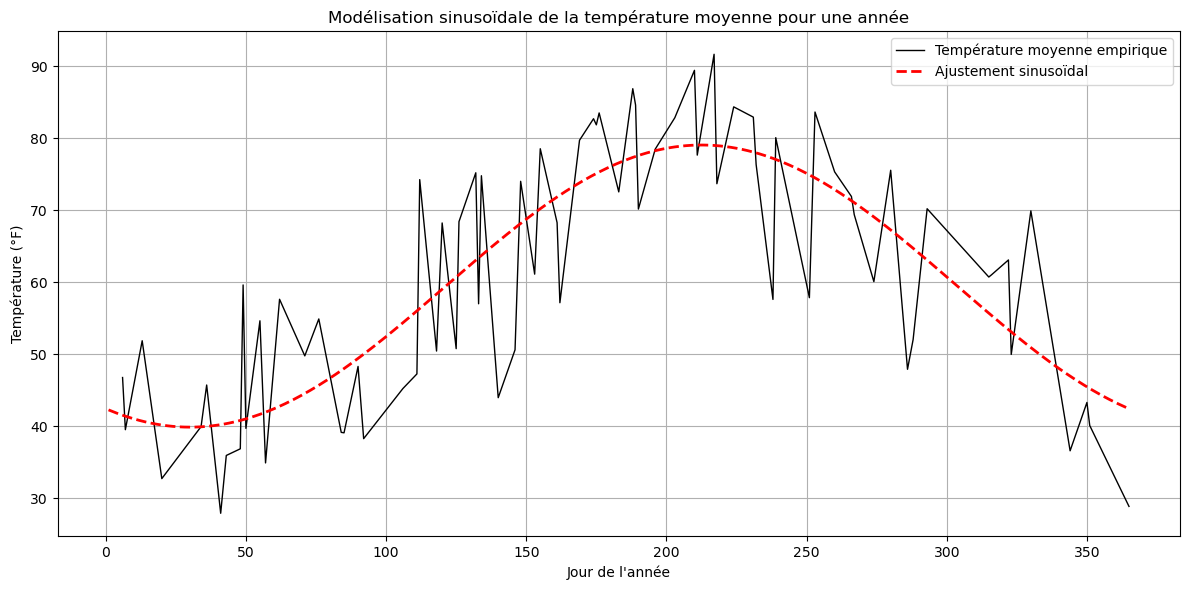

array([ 19.59334595, 121.2812337 ,  59.45213196])

In [494]:
df_sin = df.dropna(subset=["Date", "Temperature"])  # On garde seulement les dates valides et temp√©rature

# Calcul du jour de l'ann√©e
df_sin["DayOfYear"] = df_sin["Date"].dt.dayofyear

# Temp√©rature moyenne par jour de l'ann√©e
avg_temp_by_day = df_sin.groupby("DayOfYear")["Temperature"].mean().reset_index()

# Fonction sinuso√Ødale √† ajuster
def sinusoidal(x, A, phi, B):
    return A * np.sin(2 * np.pi * (x - phi) / 365) + B

# Ajustement de la fonction sinuso√Ødale aux temp√©ratures moyennes
x_data = avg_temp_by_day["DayOfYear"]
y_data = avg_temp_by_day["Temperature"]

params, _ = curve_fit(sinusoidal, x_data, y_data, p0=[20, 180, 60])  # Estimation initiale

# G√©n√©ration de la courbe ajust√©e
x_fit = np.linspace(1, 365, 365)
y_fit = sinusoidal(x_fit, *params)

# Affichage
plt.figure(figsize=(12, 6))
plt.plot(x_data, y_data, label="Temp√©rature moyenne empirique", color="black", linewidth=1)
plt.plot(x_fit, y_fit, label="Ajustement sinuso√Ødal", color="red", linestyle="--", linewidth=2)
plt.xlabel("Jour de l'ann√©e")
plt.ylabel("Temp√©rature (¬∞F)")
plt.title("Mod√©lisation sinuso√Ødale de la temp√©rature moyenne pour une ann√©e")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

params  # On retourne les param√®tres pour les examiner ensuite


C:\Users\licor\AppData\Local\Temp\ipykernel_53412\4288450794.py:40: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.

c:\Users\licor\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



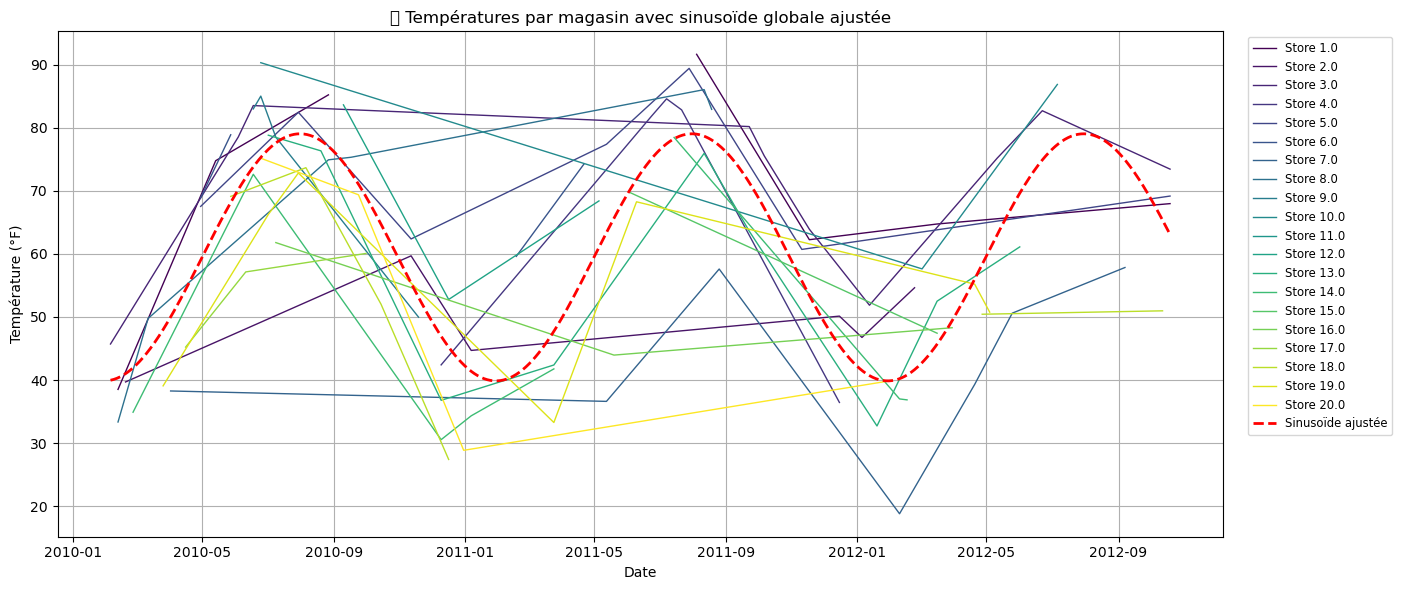

In [495]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Param√®tres globaux de la sinuso√Øde ajust√©e sur 1 an
A = 19.59334595
phi = 121.2812337
B = 59.45213196

# 1. G√©n√©rer toutes les dates du DataFrame
dates_unique = pd.date_range(start=df["Date"].min(), end=df["Date"].max())

# 2. Calculer le jour de l'ann√©e pour ces dates
day_of_year = dates_unique.dayofyear

# 3. Calculer la sinuso√Øde sur toutes les dates
sinusoid_values = A * np.sin(2 * np.pi * (day_of_year - phi) / 365) + B

# 4. Affichage
plt.figure(figsize=(14, 6))

# G√©n√©rer une couleur unique par magasin
stores = sorted(df["Store"].unique())
colors = plt.cm.viridis(np.linspace(0, 1, len(stores)))

# Tracer les temp√©ratures r√©elles pour chaque magasin avec sa couleur
for store, color in zip(stores, colors):
    store_data = df[df["Store"] == store].sort_values("Date")
    plt.plot(store_data["Date"], store_data["Temperature"], label=f"Store {store}", color=color, linewidth=1)

# Tracer la sinuso√Øde globale
plt.plot(dates_unique, sinusoid_values, 'r--', linewidth=2, label="Sinuso√Øde ajust√©e")

# Mise en forme
plt.title("üìà Temp√©ratures par magasin avec sinuso√Øde globale ajust√©e")
plt.xlabel("Date")
plt.ylabel("Temp√©rature (¬∞F)")
plt.grid(True)
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1), ncol=1, fontsize="small")
plt.tight_layout()
plt.show()




In [496]:
# Cr√©er un mapping Date ‚Üí Temp√©rature sinusoidale
sinusoid_df = pd.DataFrame({
    "Date": dates_unique,
    "Sinusoid_Temperature": sinusoid_values
})

# Fusion avec df original pour r√©cup√©rer temp√©rature sinuso√Ødale par ligne
df = df.merge(sinusoid_df, on="Date", how="left")

# Remplir les NaN dans Temperature avec la sinuso√Øde
df["Temperature"] = df["Temperature"].fillna(df["Sinusoid_Temperature"])

# (Optionnel) supprimer la colonne d'appoint
df.drop(columns=["Sinusoid_Temperature"], inplace=True)



In [497]:
# miss values row
rows_with_nan = df[df.isnull().any(axis=1)]

print(f"Total nombre de lignes 'df' : {df.shape[0]}\nüîç Nombre de lignes avec des valeurs manquantes : {rows_with_nan.shape[0]}")

Total nombre de lignes 'df' : 118
üîç Nombre de lignes avec des valeurs manquantes : 28


##### Flag_holiday missing values

In [498]:
# USA holidays
holidays = pd.DataFrame([
    {"Holiday": "Winter Break",      "start_date": "2010-12-20", "End_date": "2011-01-03"},
    {"Holiday": "Spring Break",      "start_date": "2011-03-15", "End_date": "2011-04-01"},
    {"Holiday": "Summer Vacation",   "start_date": "2011-06-15", "End_date": "2011-08-31"},
    {"Holiday": "Thanksgiving Week", "start_date": "2011-11-21", "End_date": "2011-11-27"},
    {"Holiday": "Winter Break",      "start_date": "2011-12-19", "End_date": "2012-01-03"},
    {"Holiday": "Spring Break",      "start_date": "2012-03-15", "End_date": "2012-04-01"},
    {"Holiday": "Summer Vacation",   "start_date": "2012-06-15", "End_date": "2012-08-31"},
    {"Holiday": "Thanksgiving Week", "start_date": "2012-11-19", "End_date": "2012-11-25"},
    {"Holiday": "Winter Break",      "start_date": "2012-12-20", "End_date": "2013-01-03"},
], columns=["Holiday", "start_date", "End_date"])

# Convertir en datetime
holidays["start_date"] = pd.to_datetime(holidays["start_date"])
holidays["End_date"] = pd.to_datetime(holidays["End_date"])

# Affichage
display(holidays)


Holiday start_date   End_date
0       Winter Break 2010-12-20 2011-01-03
1       Spring Break 2011-03-15 2011-04-01
2    Summer Vacation 2011-06-15 2011-08-31
3  Thanksgiving Week 2011-11-21 2011-11-27
4       Winter Break 2011-12-19 2012-01-03
5       Spring Break 2012-03-15 2012-04-01
6    Summer Vacation 2012-06-15 2012-08-31
7  Thanksgiving Week 2012-11-19 2012-11-25
8       Winter Break 2012-12-20 2013-01-03

In [499]:
# Identifier les lignes o√π Holiday_Flag est manquant mais Date est pr√©sente
mask_nan_holiday = df["Holiday_Flag"].isna() & df["Date"].notna()

# Appliquer le remplissage
def infer_holiday_flag(date):
    for _, row in holidays.iterrows():
        if row["start_date"] <= date <= row["End_date"]:
            return 1  # C‚Äôest une p√©riode de vacances
    return 0  # Ce n‚Äôest pas une p√©riode de vacances

# Appliquer uniquement aux lignes avec NaN
df.loc[mask_nan_holiday, "Holiday_Flag"] = df.loc[mask_nan_holiday, "Date"].apply(infer_holiday_flag)

# Rep√©rer les cas o√π on n‚Äôa pas pu remplir faute de date
dates_absentes = df[df["Holiday_Flag"].isna() & df["Date"].isna()]
if not dates_absentes.empty:
    print("‚ö†Ô∏è Certaines lignes ont une Holiday_Flag manquante et pas de date :")
    display(dates_absentes)

print("‚úÖ Holiday_Flag compl√©t√© selon les p√©riodes de vacances scolaires.")


‚úÖ Holiday_Flag compl√©t√© selon les p√©riodes de vacances scolaires.


In [500]:
# miss values row
rows_with_nan = df[df.isnull().any(axis=1)]

print(f"Total nombre de lignes 'df' : {df.shape[0]}\nüîç Nombre de lignes avec des valeurs manquantes : {rows_with_nan.shape[0]}")

Total nombre de lignes 'df' : 118
üîç Nombre de lignes avec des valeurs manquantes : 19


### missing values by store 

In [501]:
def generate_store_dataframes(df):
    """
    G√©n√®re un dictionnaire de DataFrames tri√©s par date pour chaque Store (1 √† 20),
    et affiche le total de lignes au final.
    """
    store_dfs = {}
    total_rows = 0

    for store_id in range(1, 21):
        store_df = df[df["Store"] == store_id].copy()
        store_df = store_df.sort_values(by="Date").reset_index(drop=True)
        store_dfs[store_id] = store_df
        nb_rows = store_df.shape[0]
        total_rows += nb_rows
        print(f"‚úÖ Store {store_id} : {nb_rows} lignes")

    print(f"\nüìä Total de lignes dans tous les DataFrames : {total_rows}")
    return store_dfs




In [502]:
store_dfs = generate_store_dataframes(df)


‚úÖ Store 1 : 8 lignes
‚úÖ Store 2 : 6 lignes
‚úÖ Store 3 : 10 lignes
‚úÖ Store 4 : 6 lignes
‚úÖ Store 5 : 7 lignes
‚úÖ Store 6 : 6 lignes
‚úÖ Store 7 : 7 lignes
‚úÖ Store 8 : 6 lignes
‚úÖ Store 9 : 4 lignes
‚úÖ Store 10 : 3 lignes
‚úÖ Store 11 : 1 lignes
‚úÖ Store 12 : 5 lignes
‚úÖ Store 13 : 9 lignes
‚úÖ Store 14 : 9 lignes
‚úÖ Store 15 : 3 lignes
‚úÖ Store 16 : 4 lignes
‚úÖ Store 17 : 5 lignes
‚úÖ Store 18 : 7 lignes
‚úÖ Store 19 : 8 lignes
‚úÖ Store 20 : 4 lignes

üìä Total de lignes dans tous les DataFrames : 118


#### missing values by interploating

In [503]:
def interpolate_column_for_all_stores(store_dfs, column_name):
    """
    Interpole la colonne sp√©cifi√©e (par interpolation lin√©aire bidirectionnelle)
    dans tous les DataFrames de store_dfs tri√©s par date.
    
    Param√®tres :
    - store_dfs : dict[int, pd.DataFrame], les DataFrames index√©s par store_id
    - column_name : str, le nom de la colonne √† interpoler
    """
    for store_id, df in store_dfs.items():
        if "Date" not in df.columns:
            print(f"‚ö†Ô∏è Store {store_id} : colonne 'Date' manquante.")
            continue
        if column_name not in df.columns:
            print(f"‚ö†Ô∏è Store {store_id} : colonne '{column_name}' manquante.")
            continue

        df = df.sort_values("Date").reset_index(drop=True)
        before_na = df[column_name].isna().sum()

        df[column_name] = df[column_name].interpolate(method="linear", limit_direction="both")

        after_na = df[column_name].isna().sum()
        store_dfs[store_id] = df

        print(f"‚úÖ Store {store_id} : '{column_name}' interpol√©e ({before_na - after_na} valeurs combl√©es).")





In [504]:
interpolate_column_for_all_stores(store_dfs,"CPI")


‚úÖ Store 1 : 'CPI' interpol√©e (0 valeurs combl√©es).
‚úÖ Store 2 : 'CPI' interpol√©e (1 valeurs combl√©es).
‚úÖ Store 3 : 'CPI' interpol√©e (2 valeurs combl√©es).
‚úÖ Store 4 : 'CPI' interpol√©e (0 valeurs combl√©es).
‚úÖ Store 5 : 'CPI' interpol√©e (0 valeurs combl√©es).
‚úÖ Store 6 : 'CPI' interpol√©e (0 valeurs combl√©es).
‚úÖ Store 7 : 'CPI' interpol√©e (0 valeurs combl√©es).
‚úÖ Store 8 : 'CPI' interpol√©e (0 valeurs combl√©es).
‚úÖ Store 9 : 'CPI' interpol√©e (0 valeurs combl√©es).
‚úÖ Store 10 : 'CPI' interpol√©e (0 valeurs combl√©es).
‚úÖ Store 11 : 'CPI' interpol√©e (0 valeurs combl√©es).
‚úÖ Store 12 : 'CPI' interpol√©e (0 valeurs combl√©es).
‚úÖ Store 13 : 'CPI' interpol√©e (1 valeurs combl√©es).
‚úÖ Store 14 : 'CPI' interpol√©e (3 valeurs combl√©es).
‚úÖ Store 15 : 'CPI' interpol√©e (0 valeurs combl√©es).
‚úÖ Store 16 : 'CPI' interpol√©e (0 valeurs combl√©es).
‚úÖ Store 17 : 'CPI' interpol√©e (0 valeurs combl√©es).
‚úÖ Store 18 : 'CPI' interpol√©e (1 valeurs combl√©es).
‚

In [505]:
interpolate_column_for_all_stores(store_dfs,"Unemployment")

‚úÖ Store 1 : 'Unemployment' interpol√©e (1 valeurs combl√©es).
‚úÖ Store 2 : 'Unemployment' interpol√©e (1 valeurs combl√©es).
‚úÖ Store 3 : 'Unemployment' interpol√©e (0 valeurs combl√©es).
‚úÖ Store 4 : 'Unemployment' interpol√©e (0 valeurs combl√©es).
‚úÖ Store 5 : 'Unemployment' interpol√©e (1 valeurs combl√©es).
‚úÖ Store 6 : 'Unemployment' interpol√©e (0 valeurs combl√©es).
‚úÖ Store 7 : 'Unemployment' interpol√©e (0 valeurs combl√©es).
‚úÖ Store 8 : 'Unemployment' interpol√©e (1 valeurs combl√©es).
‚úÖ Store 9 : 'Unemployment' interpol√©e (1 valeurs combl√©es).
‚úÖ Store 10 : 'Unemployment' interpol√©e (0 valeurs combl√©es).
‚úÖ Store 11 : 'Unemployment' interpol√©e (0 valeurs combl√©es).
‚úÖ Store 12 : 'Unemployment' interpol√©e (0 valeurs combl√©es).
‚úÖ Store 13 : 'Unemployment' interpol√©e (0 valeurs combl√©es).
‚úÖ Store 14 : 'Unemployment' interpol√©e (2 valeurs combl√©es).
‚úÖ Store 15 : 'Unemployment' interpol√©e (1 valeurs combl√©es).
‚úÖ Store 16 : 'Unemployment' inte

In [506]:
# Concat√©nation des DataFrames de store_dfs en un seul DataFrame
df_final = pd.concat(store_dfs.values(), ignore_index=True)



In [507]:
print("Number of rows : {}".format(df_final.shape[0]))
print("Number of columns : {}".format(df_final.shape[1]))

# miss values row
rows_with_nan = df_final[df_final.isnull().any(axis=1)]

print(f"\nNombre de lignes avec des valeurs manquantes : {rows_with_nan.shape[0]}")
display(df_final.head())


Number of rows : 118
Number of columns : 14

Nombre de lignes avec des valeurs manquantes : 0


Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0    1.0 2010-02-12    1641957.44           1.0    38.510000       2.548   
1    1.0 2010-05-14    1494251.50           0.0    74.780000       2.854   
2    1.0 2010-08-27    1449142.92           0.0    85.220000       2.619   
3    1.0 2011-05-27    1466046.67           0.0    67.846042       3.786   
4    1.0 2011-08-05    1624383.75           1.0    91.650000       3.684   

          CPI  Unemployment  Year  Month  Day  DayOfWeek  DayOfYear  \
0  211.242170         8.106  2010      2   12          4         43   
1  210.337426         7.808  2010      5   14          4        134   
2  211.567306         7.787  2010      8   27          4        239   
3  215.503788         7.682  2011      5   27          4        147   
4  215.544618         7.962  2011      8    5          4        217   

   WeekOfYear  
0           6  
1          19  
2          34  
3          21  
4          31

### outliers

In [508]:
# Liste des colonnes num√©riques √† v√©rifier
Num_features = ['Unemployment']

# Cr√©ation du masque des outliers sur le df_final complet
outliers_mask = pd.Series(False, index=df_final.index)

for col in Num_features:
    mean = df_final[col].mean()
    std = df_final[col].std()
    outlier_min = mean - 3 * std
    outlier_max = mean + 3 * std

    # Cumul des lignes consid√©r√©es comme outliers
    outliers_mask |= (df_final[col] < outlier_min) | (df_final[col] > outlier_max)

# S√©paration des lignes
df_outliers = df_final[outliers_mask]
df_final = df_final[~outliers_mask]

# Affichage des r√©sultats
print(f"‚úÖ Nombre de lignes apr√®s suppression des outliers : {df_final.shape[0]}")

# miss values row
rows_with_nan = df_final[df_final.isnull().any(axis=1)]

print(f"\nNombre de lignes avec des valeurs manquantes : {rows_with_nan.shape[0]}")

display (df_final.head())

‚úÖ Nombre de lignes apr√®s suppression des outliers : 113

Nombre de lignes avec des valeurs manquantes : 0


Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0    1.0 2010-02-12    1641957.44           1.0    38.510000       2.548   
1    1.0 2010-05-14    1494251.50           0.0    74.780000       2.854   
2    1.0 2010-08-27    1449142.92           0.0    85.220000       2.619   
3    1.0 2011-05-27    1466046.67           0.0    67.846042       3.786   
4    1.0 2011-08-05    1624383.75           1.0    91.650000       3.684   

          CPI  Unemployment  Year  Month  Day  DayOfWeek  DayOfYear  \
0  211.242170         8.106  2010      2   12          4         43   
1  210.337426         7.808  2010      5   14          4        134   
2  211.567306         7.787  2010      8   27          4        239   
3  215.503788         7.682  2011      5   27          4        147   
4  215.544618         7.962  2011      8    5          4        217   

   WeekOfYear  
0           6  
1          19  
2          34  
3          21  
4          31

#### cleaning 

In [509]:
df_clean = df_final.copy()
df_clean.drop(columns=["Date", "DayOfWeek", "Day","DayOfYear"], inplace=True)


In [510]:
df_clean

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0      1.0    1641957.44           1.0    38.510000       2.548  211.242170   
1      1.0    1494251.50           0.0    74.780000       2.854  210.337426   
2      1.0    1449142.92           0.0    85.220000       2.619  211.567306   
3      1.0    1466046.67           0.0    67.846042       3.786  215.503788   
4      1.0    1624383.75           1.0    91.650000       3.684  215.544618   
..     ...           ...           ...          ...         ...         ...   
113   19.0    1468350.36           0.0    74.891182       3.722  138.162900   
114   20.0    1973135.87           0.0    75.170000       2.808  204.567546   
115   20.0    1789687.65           0.0    69.370000       2.795  204.605386   
116   20.0    1799737.79           1.0    28.850000       3.179  204.643227   
117   20.0    2203523.20           0.0    39.930000       3.617  213.023622   

     Unemployment  Year  Month  WeekOfYear  
0           8.106  2010      2           6  
1           7.808  2010      5          19  
2           7.787  2010      8          34  
3           7.682  2011      5          21  
4           7.962  2011      8          31  
..            ...   ...    ...         ...  
113         8.150  2012      6          25  
114         7.856  2010      6          25  
115         7.527  2010      9          38  
116         7.484  2010     12          52  
117         6.961  2012      2           5  

[113 rows x 10 columns]

## Machine Learning


##### Preprocessing

In [511]:
# Separate target variable Y from features X
target = 'Weekly_Sales'

print("Separating labels from features...")
Y = df_clean.loc[:,target]
X = df_clean.drop(target, axis = 1) # All columns are kept, except the target
print("...Done.")
print(Y.head())
print()
print(X.head())
print()

Separating labels from features...
...Done.
0    1641957.44
1    1494251.50
2    1449142.92
3    1466046.67
4    1624383.75
Name: Weekly_Sales, dtype: float64

   Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0    1.0           1.0    38.510000       2.548  211.242170         8.106   
1    1.0           0.0    74.780000       2.854  210.337426         7.808   
2    1.0           0.0    85.220000       2.619  211.567306         7.787   
3    1.0           0.0    67.846042       3.786  215.503788         7.682   
4    1.0           1.0    91.650000       3.684  215.544618         7.962   

   Year  Month  WeekOfYear  
0  2010      2           6  
1  2010      5          19  
2  2010      8          34  
3  2011      5          21  
4  2011      8          31  



In [512]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("...Done.")


Dividing into train and test sets...
...Done.


In [513]:
numeric_features = ["Temperature", "Fuel_Price", "CPI", "Unemployment"]
categorical_features = ["Store", "Holiday_Flag", "Year", "Month", "WeekOfYear"]

# Pipelines
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')


In [514]:
# Use ColumnTranformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.\n')
print(X_train[0:5,:])


# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head())
X_test = preprocessor.transform(X_test)
print('...Done.')
print(X_test[0:5,:])


Performing preprocessings on train set...
     Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
31     5.0           0.0        82.46       2.640  211.927001         6.496   
72    13.0           0.0        42.38       3.435  128.616064         7.470   
115   20.0           0.0        69.37       2.795  204.605386         7.527   
112   19.0           0.0        50.76       4.124  138.033200         8.150   
22     3.0           0.0        82.70       3.346  225.306861         6.664   

     Year  Month  WeekOfYear  
31   2010      7          30  
72   2011      3          12  
115  2010      9          38  
112  2012      5          18  
22   2012      6          25  
...Done.

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 38 stored elements and shape (5, 76)>
  Coords	Values
  (0, 0)	1.1829802664680473
  (0, 1)	-1.2190703763402937
  (0, 2)	0.7975171889750571
  (0, 3)	-0.9042801802116147
  (0, 7)	1.0
  (0, 30)	1.0
  (0, 61)	1.0
  (1, 0)	-1.1702

c:\Users\licor\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning:

Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros




##### Train model

In [515]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [516]:
# üìä Affichage des coefficients du mod√®le lin√©aire
print("üìä Coefficients du mod√®le lin√©aire :")

# R√©cup√©rer les noms des features apr√®s le preprocessing
feature_names = preprocessor.get_feature_names_out()

# Cr√©er une DataFrame avec les coefficients
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": regressor.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

# Affichage
display(coef_df)

print(f"\n‚úÖ Le nombre de coefficients est de {coef_df.shape[0]}")

# Interpr√©tation simple
print("\nüîé Interpr√©tation :")
print("Les coefficients montrent l'effet de chaque variable sur les ventes hebdomadaires (Weekly_Sales).")
print("‚úîÔ∏è Coeff positif ‚Üí variable associ√©e √† une hausse des ventes.")
print("‚ùå Coeff n√©gatif ‚Üí variable associ√©e √† une baisse des ventes.")
print("‚ö†Ô∏è Pour les variables cat√©gorielles (ex: Store_2), l'effet est compar√© √† une cat√©gorie de r√©f√©rence.")


üìä Coefficients du mod√®le lin√©aire :


Feature   Coefficient
14       cat__Store_13.0  2.068566e+06
6         cat__Store_4.0  2.022472e+06
12       cat__Store_10.0  1.954108e+06
20       cat__Store_19.0  1.569853e+06
15       cat__Store_14.0  1.379146e+06
..                   ...           ...
63  cat__WeekOfYear_32.0  2.997774e+04
51  cat__WeekOfYear_20.0 -2.173105e+04
54  cat__WeekOfYear_23.0 -1.246465e+04
68  cat__WeekOfYear_38.0  8.619023e+03
8         cat__Store_6.0  3.891567e+03

[76 rows x 2 columns]


‚úÖ Le nombre de coefficients est de 76

üîé Interpr√©tation :
Les coefficients montrent l'effet de chaque variable sur les ventes hebdomadaires (Weekly_Sales).
‚úîÔ∏è Coeff positif ‚Üí variable associ√©e √† une hausse des ventes.
‚ùå Coeff n√©gatif ‚Üí variable associ√©e √† une baisse des ventes.
‚ö†Ô∏è Pour les variables cat√©gorielles (ex: Store_2), l'effet est compar√© √† une cat√©gorie de r√©f√©rence.



##### Performance assessment

In [517]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[ 288867.29009765 1806521.3546502  1891999.1281477  1350988.68372398
  464539.60226902  410928.92059    1465229.32548129 2149619.02301426
  396968.60394667  280707.48368475 1401578.78600635 1891612.18907903
  338271.61474088 1839263.74615821 1963037.65941263 2036230.96269896
 1483372.03888612 1573631.38758185  929424.51379304 1999945.83119273
 1519164.91019494  335570.35658405  374462.74552667 1065452.03830721
  233167.09332484  513108.69511725 1507793.20302434  561145.54228828
 1949063.56423965  614253.56743874 2003723.23341923  416418.70448407
  857402.87052748 1166119.3648602  2348908.49431093 2089637.62471336
  535796.94391199  597878.4150849  1921816.58934204 1953542.86998248
 1932385.03130151 1488563.49406645  262935.62115075 1659605.34109945
  875213.97696938 1637255.8384321  2035577.3956597  1646865.88037446
  757737.78095974  878075.64083971  987642.3160348  1864746.2279814
  570617.49932325 1942268.86161157 1990371.09171198 1942342.7675

In [518]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = regressor.predict(X_test)
print("...Done.")
print(Y_test_pred)


Predictions on test set...
...Done.
[2197556.49756933 1391088.47160927 1729907.89388793 1919541.19697555
 1647164.11696999  258979.51743161 1672315.83360091 2321200.24206444
  441579.93498557 2585808.38205779  879464.49100205  449817.29955124
  560440.79588425 1971786.36948314  273079.3353815  1537727.33454805
 2031746.9407973  2075956.28146401 2279132.84839552  864277.50191514
 1325670.21161213  805584.74916406 1749392.34549054]


In [519]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9963773236659882
R2 score on test set :  0.9487854359471403


In [520]:
scores = cross_val_score(regressor,X_train, Y_train, cv=10)
avg = scores.mean()
std = scores.std()
print('Cross-validated accuracy : {}\nstandard deviation : {}'.format(avg, std))

Cross-validated accuracy : 0.9160520695396025
standard deviation : 0.05083583707229929


##### 4 - Regularization

Ridge and Lasso both help avoid overfitting: 
- Ridge reduces coefficient values
- Lasso selects the most important variables by removing the coefficient of less significant variables

<a id='ridge'></a>
a - Ridge

In [521]:
ridge = Ridge()
print(ridge)
ridge.fit(X_train, Y_train)
# Print R^2 scores
print("R2 score on training set : ", ridge.score(X_train, Y_train))
print("R2 score on test set : ", ridge.score(X_test, Y_test))

Ridge()
R2 score on training set :  0.9556482714522694
R2 score on test set :  0.902713319851775


In [522]:
# üìä Coefficients du mod√®le Ridge
print("üìä Coefficients du mod√®le Ridge :")

feature_names = preprocessor.get_feature_names_out()

ridge_coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": ridge.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

display(ridge_coef_df)

print(f"\n‚úÖ Le nombre de coefficients est de {ridge_coef_df.shape[0]}")




üìä Coefficients du mod√®le Ridge :


Feature    Coefficient
5         cat__Store_3.0 -745237.177704
7         cat__Store_5.0 -702735.598755
16       cat__Store_15.0 -586103.325767
21       cat__Store_20.0  565117.696318
15       cat__Store_14.0  555614.932718
..                   ...            ...
33       cat__Month_10.0    8945.796413
64  cat__WeekOfYear_33.0   -8921.361611
63  cat__WeekOfYear_32.0   -8599.759750
55  cat__WeekOfYear_24.0   -5433.070795
52  cat__WeekOfYear_21.0    3901.693524

[76 rows x 2 columns]


‚úÖ Le nombre de coefficients est de 76


<a id='lasso'></a>
a - Lasso

In [523]:
lasso = Lasso()
print(lasso)
lasso.fit(X_train, Y_train)
# Print R^2 scores
print("R2 score on training set : ", lasso.score(X_train, Y_train))
print("R2 score on test set : ", lasso.score(X_test, Y_test))

Lasso()
R2 score on training set :  0.996100481935805
R2 score on test set :  0.927171551283243


c:\Users\licor\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 79196894088.00972, tolerance: 4034163635.196278



In [524]:
# üìä Coefficients du mod√®le Lasso
print("üìä Coefficients du mod√®le Lasso :")

feature_names = preprocessor.get_feature_names_out()

lasso_coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": lasso.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

display(lasso_coef_df)

print(f"\n‚úÖ Le nombre de coefficients est de {lasso_coef_df.shape[0]}")

nb_zero = (lasso_coef_df["Coefficient"] == 0).sum()
print(f"‚ùå Nombre de coefficients mis √† z√©ro par Lasso : {nb_zero}")



üìä Coefficients du mod√®le Lasso :


Feature   Coefficient
7         cat__Store_5.0 -1.247832e+06
5         cat__Store_3.0 -1.202373e+06
11        cat__Store_9.0 -1.171609e+06
17       cat__Store_16.0 -9.804919e+05
16       cat__Store_15.0 -9.693925e+05
..                   ...           ...
2               num__CPI -1.564757e+04
47  cat__WeekOfYear_16.0  1.446356e+04
67  cat__WeekOfYear_37.0  1.332598e+04
74  cat__WeekOfYear_49.0  1.149657e+04
20       cat__Store_19.0 -3.419109e+01

[76 rows x 2 columns]


‚úÖ Le nombre de coefficients est de 76
‚ùå Nombre de coefficients mis √† z√©ro par Lasso : 0


##### Hyperparameter optimization

optimization ridge

In [525]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Mod√®le Ridge de base
regressor = Ridge()

# Grille de valeurs √©largie pour alpha
params = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000]
}

# GridSearchCV avec validation crois√©e
print("üîç Grid search Ridge...")
best_ridge = GridSearchCV(regressor, param_grid=params, cv=10)
best_ridge.fit(X_train, Y_train)
print("‚úÖ ...Done.")
print("üîß Meilleur alpha :", best_ridge.best_params_)
print("üìä R¬≤ moyen en validation crois√©e :", best_ridge.best_score_)

# Calcul des R¬≤
r2_train = best_ridge.score(X_train, Y_train)  # R¬≤ sur le train
Y_pred = best_ridge.predict(X_test)            # Pr√©diction sur le test
r2_test = r2_score(Y_test, Y_pred)             # R¬≤ sur le test

# Affichage des scores
print("\nüéØ √âvaluation du mod√®le Ridge final :")
print(f"‚úÖ R¬≤ entra√Ænement : {r2_train:.4f}")
print(f"‚úÖ R¬≤ test         : {r2_test:.4f}")


üîç Grid search Ridge...
‚úÖ ...Done.
üîß Meilleur alpha : {'alpha': 0.01}
üìä R¬≤ moyen en validation crois√©e : 0.9138708110177161

üéØ √âvaluation du mod√®le Ridge final :
‚úÖ R¬≤ entra√Ænement : 0.9961
‚úÖ R¬≤ test         : 0.9457


In [526]:
# üìä Coefficients du meilleur mod√®le Ridge
print("üìä Coefficients du meilleur mod√®le Ridge :")

# R√©cup√©ration des coefficients
ridge_best_coef = best_ridge.best_estimator_.coef_

# Cr√©ation du DataFrame
ridge_coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": ridge_best_coef
}).sort_values(by="Coefficient", key=abs, ascending=False)

# Affichage
display(ridge_coef_df)

# Synth√®se
print(f"\n‚úÖ Nombre de coefficients : {ridge_coef_df.shape[0]}")


üìä Coefficients du meilleur mod√®le Ridge :


Feature   Coefficient
7         cat__Store_5.0 -1.226843e+06
5         cat__Store_3.0 -1.191325e+06
11        cat__Store_9.0 -1.146019e+06
17       cat__Store_16.0 -9.012488e+05
15       cat__Store_14.0  8.412665e+05
..                   ...           ...
45  cat__WeekOfYear_13.0  2.623728e+04
24      cat__Year_2012.0  2.174636e+04
63  cat__WeekOfYear_32.0  1.792689e+04
68  cat__WeekOfYear_38.0 -1.135949e+04
54  cat__WeekOfYear_23.0  6.978753e+03

[76 rows x 2 columns]


‚úÖ Nombre de coefficients : 76


optimization lasso 

In [527]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Mod√®le Lasso
regressor = Lasso(max_iter=10000)

# Grille √©largie pour alpha
params = {'alpha': [0.01, 0.1, 1, 10, 100, 500, 1000, 5000, 10000]}


# GridSearchCV
print("üîç Grid search Lasso...")
best_lasso = GridSearchCV(regressor, param_grid=params, cv=10)
best_lasso.fit(X_train, Y_train)
print("‚úÖ ...Done.")
print("üîß Meilleur alpha :", best_lasso.best_params_)
print("üìä R¬≤ moyen en validation crois√©e :", best_lasso.best_score_)

# Calcul des R¬≤
r2_train = best_lasso.score(X_train, Y_train)
Y_pred = best_lasso.predict(X_test)
r2_test = r2_score(Y_test, Y_pred)

# Affichage
print("\nüéØ √âvaluation du mod√®le Lasso final :")
print(f"‚úÖ R¬≤ entra√Ænement : {r2_train:.4f}")
print(f"‚úÖ R¬≤ test         : {r2_test:.4f}")


üîç Grid search Lasso...


c:\Users\licor\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 47301132586.03653, tolerance: 3592434231.1294565

c:\Users\licor\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 51843788492.244514, tolerance: 3633558601.442238

c:\Users\licor\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 65775966419.00659, tolerance: 3636417681.4092526

c:\Users\licor\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 57755217021.74941, tol

‚úÖ ...Done.
üîß Meilleur alpha : {'alpha': 1000}
üìä R¬≤ moyen en validation crois√©e : 0.9508074280102992

üéØ √âvaluation du mod√®le Lasso final :
‚úÖ R¬≤ entra√Ænement : 0.9906
‚úÖ R¬≤ test         : 0.9554


c:\Users\licor\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 18672115587.405296, tolerance: 3602000935.2633953



In [528]:
# R√©cup√©rer les coefficients du meilleur mod√®le Lasso
lasso_best_coef = best_lasso.best_estimator_.coef_

# Refaire un DataFrame lisible
lasso_coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": lasso_best_coef
}).sort_values(by="Coefficient", key=abs, ascending=False)

display(lasso_coef_df)

# Compter combien de coefficients ont √©t√© mis √† z√©ro
zero_count = (lasso_coef_df["Coefficient"] == 0).sum()
print(f"üìâ Coefficients mis √† z√©ro par Lasso : {zero_count} / {len(lasso_coef_df)}")


Feature   Coefficient
7         cat__Store_5.0 -1.225211e+06
5         cat__Store_3.0 -1.136825e+06
11        cat__Store_9.0 -1.063306e+06
17       cat__Store_16.0 -9.535699e+05
16       cat__Store_15.0 -8.681652e+05
..                   ...           ...
46  cat__WeekOfYear_15.0 -0.000000e+00
47  cat__WeekOfYear_16.0  0.000000e+00
50  cat__WeekOfYear_19.0 -0.000000e+00
53  cat__WeekOfYear_22.0 -0.000000e+00
38   cat__WeekOfYear_6.0 -0.000000e+00

[76 rows x 2 columns]

üìâ Coefficients mis √† z√©ro par Lasso : 33 / 76


In [529]:
# Print R^2 scores
print("RIDGE / R2 score on training set : ", best_ridge.score(X_train, Y_train))
print("RIDGE / R2 score on test set : ", best_ridge.score(X_test, Y_test))
print()
print("LASSO / R2 score on training set : ", best_lasso.score(X_train, Y_train))
print("LASSO / R2 score on test set : ", best_lasso.score(X_test, Y_test))

RIDGE / R2 score on training set :  0.9960697788039677
RIDGE / R2 score on test set :  0.9456714362930851

LASSO / R2 score on training set :  0.990581226875569
LASSO / R2 score on test set :  0.9554124890890402


graphiques

In [530]:
import plotly.express as px
import pandas as pd

# Pr√©parer le DataFrame pour Plotly (long format)
coef_long = coef_comparison[["Feature", "Linear", "Ridge (GS)", "Lasso (GS)"]].melt(
    id_vars="Feature", var_name="Mod√®le", value_name="Coefficient"
)

# Tri pour un affichage propre
coef_long["abs_coef"] = coef_long["Coefficient"].abs()
coef_long = coef_long.sort_values(by="abs_coef", ascending=True)

# Graphique interactif
fig = px.bar(
    coef_long,
    x="Coefficient",
    y="Feature",
    color="Mod√®le",
    orientation="h",
    title="üìä Comparaison interactive des coefficients<br>Linear vs Ridge vs Lasso (GridSearch)",
    height=1000
)

fig.update_layout(barmode="group", yaxis_title="Variables", xaxis_title="Valeur du coefficient")
fig.show()
